# Model Building

Let's compare the logistic regression with all variables and only the selected variables with p > 0.25 in the univariate analysis.

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_double(),
  thal = col_double(),
  target = col_double()
)
Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_double(),
  thal = col_double(),
  target = col_double()
)


model,mean,median,sd
full model,0.9035265,0.9195804,0.06323870
selected model,0.9084715,0.9195804,0.05731126


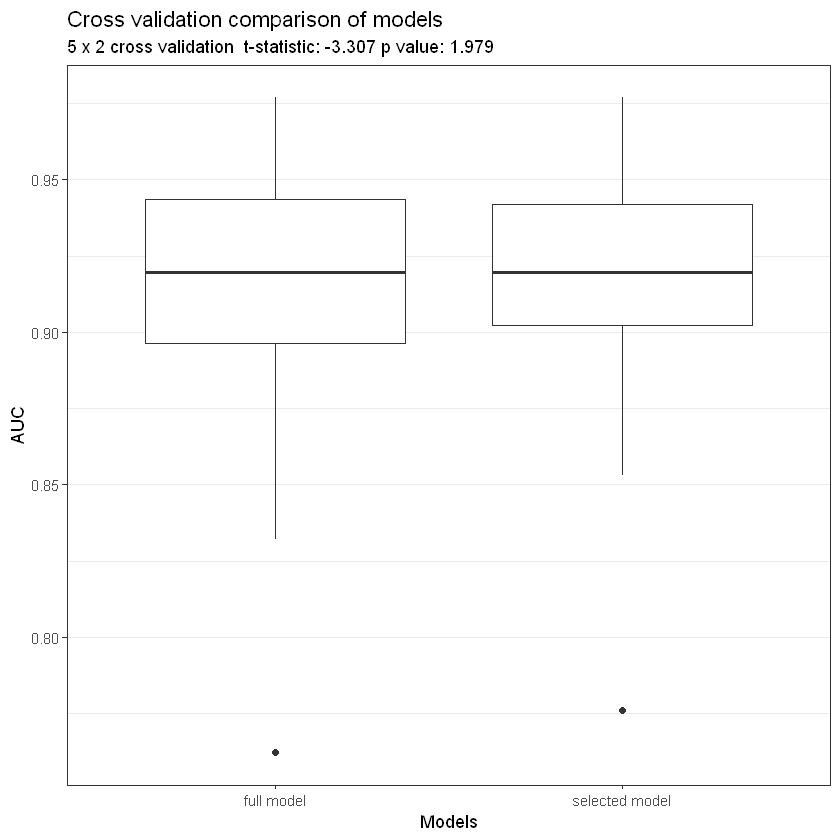

In [6]:
source("helpers.r")

learner_A <- function(training, test) {
  name <- "full model"

  fit <- glm(target ~ ., data=training, family =binomial(link = "logit"))
  y_probabilities <- predict(fit, test,  type="response")
  y_true <- ifelse(test$target == "no_disease", 0, 1)
    
  auc <- AUC(y_true = y_true, y_pred = y_probabilities)
  return(list(name = name, auc = auc))
}

learner_B <- function(training, test) {
  name <- "selected model"
  
  fit <- glm(target ~ thal + cp + oldpeak + exang +thalach + ca + slope 
             + sex + age + restecg + trestbps, data=training, family =binomial(link = "logit"))
  y_probabilities <- predict(fit, test,  type="response")
  y_true <- ifelse(test$target == "no_disease", 0, 1)
    
  auc <- AUC(y_true = y_true, y_pred = y_probabilities)
  return(list(name = name, auc = auc))
}


result <- cross_validation_selection(learner_A, learner_B)

result$model_result %>%
   group_by(model) %>%
   summarize(mean = mean(auc),
             median = median(auc),
             sd = sd(auc))

plot_result(result)

Not a real difference in the performance. Let's compare the coefficients of the multivariate model vs the coefficients of the model fit with only one variable (yes i probably should have use a loop for this task):

In [34]:
library(broom)
df  <- get_training_df_clean()

fit  <- fit <- glm(target ~ thal + cp + oldpeak + exang +thalach + ca + slope 
             + sex + age + restecg + trestbps, data=df, family =binomial(link = "logit"))
fit_multi  <- tidy(fit)

fit_uni  <- tibble(term = vector(mode = "character"),
                  estimate = vector(mode = "numeric"),
                  p.value = vector(mode = "numeric"))

fit  <- glm(target ~ thal, data=df, family =binomial(link = "logit"))
fit_uni  <-  tidy(fit) %>%  
    filter(term != "(Intercept)")  %>%
    bind_rows(fit_uni)

fit  <- glm(target ~ cp, data=df, family =binomial(link = "logit"))
fit_uni  <-  tidy(fit) %>%  
    filter(term != "(Intercept)")  %>%
    bind_rows(fit_uni)

fit  <- glm(target ~ oldpeak, data=df, family =binomial(link = "logit"))
fit_uni  <-  tidy(fit) %>%  
    filter(term != "(Intercept)")  %>%
    bind_rows(fit_uni)

fit  <- glm(target ~ exang, data=df, family =binomial(link = "logit"))
fit_uni  <-  tidy(fit) %>%  
    filter(term != "(Intercept)")  %>%
    bind_rows(fit_uni)

fit  <- glm(target ~ thalach, data=df, family =binomial(link = "logit"))
fit_uni  <-  tidy(fit) %>%  
    filter(term != "(Intercept)")  %>%
    bind_rows(fit_uni)

fit  <- glm(target ~ ca, data=df, family =binomial(link = "logit"))
fit_uni  <-  tidy(fit) %>%  
    filter(term != "(Intercept)")  %>%
    bind_rows(fit_uni)

fit  <- glm(target ~ slope, data=df, family =binomial(link = "logit"))
fit_uni  <-  tidy(fit) %>%  
    filter(term != "(Intercept)")  %>%
    bind_rows(fit_uni)

fit  <- glm(target ~ sex, data=df, family =binomial(link = "logit"))
fit_uni  <-  tidy(fit) %>%  
    filter(term != "(Intercept)")  %>%
    bind_rows(fit_uni)

fit  <- glm(target ~ age, data=df, family =binomial(link = "logit"))
fit_uni  <-  tidy(fit) %>%  
    filter(term != "(Intercept)")  %>%
    bind_rows(fit_uni)

fit  <- glm(target ~ restecg, data=df, family =binomial(link = "logit"))
fit_uni  <-  tidy(fit) %>%  
    filter(term != "(Intercept)")  %>%
    bind_rows(fit_uni)

fit  <- glm(target ~ trestbps, data=df, family =binomial(link = "logit"))
fit_uni  <-  tidy(fit) %>%  
    filter(term != "(Intercept)")  %>%
    bind_rows(fit_uni)

fit_multi %>% 
    inner_join(fit_uni, by = c("term"), suffix = c("_multi", "_uni")) %>%
    select(term, estimate_multi, estimate_uni, p.value_multi, p.value_uni)


Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_double(),
  thal = col_double(),
  target = col_double()
)


term,estimate_multi,estimate_uni,p.value_multi,p.value_uni
thalreversable_defect,0.422800839,2.13268606,6.608580e-01,8.209703e-04
thal?,-1.465726151,-0.36070721,1.275931e-01,5.781061e-01
cpatypical_angina,1.257834436,2.54091233,6.524662e-02,4.865328e-08
cpnon-anginal_pain,2.570080937,2.36580451,1.783612e-05,2.719392e-10
cpasymptomatic,2.122182272,1.57950116,3.541295e-03,2.127241e-03
oldpeak,-0.599547560,-0.97374500,2.405477e-02,1.000051e-09
exangyes,-0.583493887,-1.82502356,2.295058e-01,3.972891e-09
thalach,0.011437349,0.04621467,3.452869e-01,1.272006e-09
ca,-1.152046445,-1.00825182,1.099606e-05,1.398668e-08
slopeflat,-1.091363948,-0.35065687,2.729458e-01,4.950140e-01
